Copyright &copy; 2019 COTAI. All rights reserved.

# Introduction to TensorFlow
**Why TensorFlow?**: 
* Advantages of TensorFlow:
    * TensorFlow are supported widely by different programming languages (e.g. C/C++, Java, Python, etc.)
    * TensorFlow are supported widely by different types of devices (e.g. mobile, server, PC, etc.)
    * TensorFlow supports TPU while most of deep learning frameworks only support CPU and GPU
* Weakness of TensorFlow:
    * Hard to use due to computation graphs
    * TensorFlow are ill-organized
* Conclusion: TensorFlow is not very good for experimentation but good for commercialization

**TensorFlow 1.0 and computation graph**:
* Computation graph: a graph whose:
    * Nodes: represent operations, variables, or placeholders (i.e. the place where we feed model inputs to the graph)
    * Edges: represent data, or multi-dimensional arrays (i.e. Tensors) which flow through the different operations

<image src="https://miro.medium.com/max/2994/1*vPb9E0Yd1QUAD0oFmAgaOw.png" width="750px">

* TensorFlow-1.0's idea:
    * Step 1: to construct a computational graph first and compile the graph
    * Step 2: for each execution, an input is fed into the graph
    * Step 3: the calculations are carried out throughout the graph
    * Step 4: the execution returns an output, which is produced by the computational graph

**TensorFlow 2.0 and Eager execution mode**:
* Improvements from TensorFlow 1.0:
    * Easy-to-use since it doesn't rely on computation graph
    * Operate in the same manner as PyTorch, which is very research-friendly
* Conclusion: TensorFlow 2.0 are moving towards being good at both research and engineering

**More about TensorFlow 1.0 and TensorFlow 2.0**:
* The idea of TensorFlow-2.0's eager execution: operations return concrete values instead of constructing a computational graph to run later
* Conclusion: TF 2.0 with Eager execution mode is easy to get started and debug models
    * Explain:
        * Originally, TF asks user to create a computational graph first, then it compiles the graph and allows user to run that graph
        * When the user runs a graph by feeding an input to it, every computation is carried out internally within the graph without any Python-friendly output for debugging
            * Example: you cannot print any intermediate output of the computation graph when running it

>**NOTE**: note that in this class, we only practice with TensorFlow-2.0

# Practice with TensorFlow-2.0
## Basic steps
**Setup TensorFlow-2.0**:
* Step 0: switch to GPU runtime (for ones using Google Colab)
* Step 1: install TensorFlow-2.0 with GPU support

In [0]:
# uninstall existing TensorFlow (TF-1.5) of Google Colab
!pip uninstall -y tensorflow
# install TensorFlow-2.0 with GPU support
!pip install tensorflow-gpu

Uninstalling tensorflow-1.15.0:
  Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 421.8MB 40kB/s 
     |████████████████████████████████| 450kB 40.8MB/s 
     |████████████████████████████████| 3.8MB 41.8MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


* Step 2: import TensorFlow and enable eager execution mode

In [0]:
import tensorflow as tf

print(tf.__version__)
tf.executing_eagerly()

2.1.0


True

**Introduction to `tf.Tensor`**:
* `tf.Tensor`: the fundamental computation unit of TF-2.0, which stores concrete values (e.g. vector, matrix, tensor, et.c) just like NumPy arrays
* Switching between NumPy arrays and `tf.Tensor`s:
    * From `tf.Tensor` to NumPy array: `tf.Tensor.numpy()`

In [0]:
# declare some tensor
some_tensor = tf.constant([100, 20, 1.3])
print(type(some_tensor))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [0]:
# convert to NumPy array
some_numpy_array = some_tensor.numpy()
print(type(some_numpy_array))
print(some_numpy_array)

<class 'numpy.ndarray'>
[100.   20.    1.3]


In [0]:
# convert back to tf.Tensor
some_tensor = tf.convert_to_tensor(some_numpy_array)
print(type(some_tensor))
print(some_tensor)

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor([100.   20.    1.3], shape=(3,), dtype=float32)


In [0]:
import numpy as np

a = np.array([2, 7, 9, 5])

# print(a*3)

b = tf.convert_to_tensor(a)

print(b)
print(b*3)

tf.Tensor([2 7 9 5], shape=(4,), dtype=int64)
tf.Tensor([ 6 21 27 15], shape=(4,), dtype=int64)


* Noticeable points:
    * NumPy operations accept `tf.Tensor` arguments
    * TF math operations convert Python objects and NumPy arrays to `tf.Tensor` objects
* Overall code example:

In [0]:
def fizzbuzz(max_num):
    """This function prints "Fizz" and "Buzz" depending on whether `num` is divisible by 3 or 5
    """
    counter = tf.constant(0)
    max_num = tf.convert_to_tensor(max_num)
    for num in range(1, max_num+1):
        num = tf.constant(num)
        if int(num % 3) == 0 and int(num % 5) == 0:
            print('FizzBuzz')
        elif int(num % 3) == 0:
            print('Fizz')
        elif int(num % 5) == 0:
            print('Buzz')
        else:
            print(num.numpy())
        counter += 1

fizzbuzz(15)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz


## Deep learning with TensorFlow eager execution
**Computing gradients with TF**: gradient computation is automated with TensorFlow
* `tf.GradientTape`: used to trace operations for computing gradients later
    * Step 1: all forward-pass operations get recorded to a tape
    * Step 2: to compute the gradient, play the tape backwards and then discard
* Code:

In [0]:
w = tf.Variable([[2.0]])
with tf.GradientTape() as tape:
  loss = w*w*w + w*w + 3

grad = tape.gradient(loss, w) # compute gradient of `loss` w.r.t `w`
print(grad)

tf.Tensor([[16.]], shape=(1, 1), dtype=float32)


**Variables and Optimizers**:
* `tf.Variable`: objects store mutable `tf.Tensor`-like values, which allow computing gradient computation
    * Example:

In [0]:
A @ B 
tf.matmul()

tf.math.log()
tf.nn.relu()
tf.nn.softmax()

NameError: ignored

In [0]:
# define some simple linear model with weights `W` and biases `B`
class Linear(tf.keras.Model):
    def __init__(self):
        super(Linear, self).__init__()
        self.W = tf.Variable(5., name='weight')
        self.B = tf.Variable(10., name='bias')
        
    def call(self, inputs):
        X = inputs
        y_hat = X * self.W + self.B
        return y_hat

# define some loss function (the loss below is called "mean-squared error" (MSE))
def loss(model, inputs, targets):
    y     = targets
    y_hat = model(inputs)
    error = y_hat - y
    return tf.reduce_mean(tf.square(error))

# compute the gradient of `loss_value` w.r.t `model.W` and `model.B`
def grad(model, inputs, targets):
    # here we use `tf.GradientTape` to record intermediate values of the computations
    # and compute gradients (as given in the example above) 
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return tape.gradient(loss_value, [model.W, model.B])

>**NOTE**: gradients of `loss_value` can only be taken w.r.t `tf.Variable` like `W` or `B` in class `Linear`

**Optimizer**: helps automatically carry out variable update following some update rule (e.g. gradient descent update rule)

**Overall code for training a simple linear model**:
* Create fake data for example

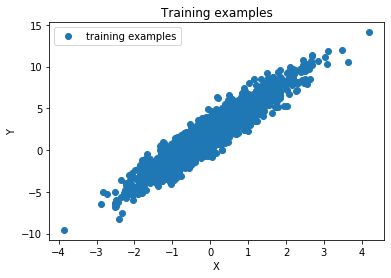

In [0]:
import matplotlib.pyplot as plt

NUM_EXAMPLES = 2000

# draw 2000 random numbers as the training inputs
training_inputs = tf.random.normal([NUM_EXAMPLES])

# define the training targets as `y = 3*x + 2` where `x` is training inputs
# here we also include some noise to `y` to make the training harder
noise = tf.random.normal([NUM_EXAMPLES])
training_outputs = training_inputs * 3 + 2 + noise

# visualize the training examples
plt.plot(training_inputs, training_outputs, 'o', label="training examples")
plt.xlabel("X"), plt.ylabel("Y")
plt.title("Training examples")
plt.legend()
plt.show()

* Write some code for visualization

In [0]:
import matplotlib.pyplot as plt

def visualize_predictions(model, training_inputs, training_outputs):
    # visualize the linear model together with the training examples
    # to see how good the linear model is
    plt.plot(training_inputs, training_outputs, 'o', label="training examples")
    plt.plot(training_inputs, model(training_inputs), label="regression model")
    plt.xlabel("X"), plt.ylabel("Y")
    plt.title("Training plot")
    plt.legend()
    plt.show()

def visualize_learning_curve(loss_history):
    # plotting learning curve is plotting the loss values against the number of iterations 
    plt.plot(range(len(loss_history)), loss_history)
    plt.xlabel("Iter"), plt.ylabel("Loss")
    plt.title("Learning curve")
    plt.show()

* Train the linear model

In [0]:
# define model, optimizer and compute the initial loss
model = Linear()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# print("Initial loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))

# train
loss_history = []
for i in range(300):
    grads = grad(model, training_inputs, training_outputs)
    optimizer.apply_gradients(zip(grads, [model.W, model.B]))
    # loss_history.append(loss(model, training_inputs, training_outputs))
    # if i % 50 == 0:
    #     print("Loss at step {:03d}: {:.3f}".format(i, loss(model, training_inputs, training_outputs)))
    #     visualize_predictions(model, training_inputs, training_outputs)

# finalize the training by printing the final loss and plot the learning curve
# print("Final loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))
# visualize_learning_curve(loss_history)

TypeError: ignored

* Show the values of the trained weights and biases

In [0]:

print("W = {}, B = {}".format(model.W.numpy(), model.B.numpy()))

**Saving a trained models**:
* Option 1: save and load weights only
    * Code: use `model.save_weights("weights")`
    * Saving format: there will be files
        * `weights.data-00000-of-00002` and `weights.data-00001-of-00002`
            * Description: TensorBundle collection, which saves the values of all variables
        * `weights.index`: string-string immutable table containing the mapping <`tensor_name`:`tensor_value`>
    * Transferring weights to another computer: we have to transfer all files with prefix `weights.` (or whatever, as we declared in the saving code)

>**NOTE**: since we save only model weights, when loading the weights back, we have to define our model first (in case our model hasn't been defined yet)

In [0]:
# save weights
model.save_weights('weights')

# load weights
status = model.load_weights('weights')

In [0]:
# checkout saved files (i.e. "weights.data-00001-of-00002", "weights.data-00000-of-00002", and "weights.index")
!ls

* Option 2: using checkpoint to save and load model as well as training state
    * Saving format: similar as option 1, but instead of files `weights.data-00000-of-00002` or `weights.index`, there will be:
        * `ckpt-<save_index>.data-00000-of-00002`, and `ckpt-<save_index>.data-00001-of-00002` where `<save_index>` is the number of index of the saved checkpoint 
        
        >**NOTE**: not necessarily be `ckpt.`, it can be any prefix as declared in `checkpoint_prefix` below)
        * `ckpt-<save_index>.index`

>**NOTE**: since we save only model weights, when loading the weights back, we have to define our model first (in case our model hasn't been defined yet)

In [0]:
import os

# define and create checkpoint dir
checkpoint_dir = 'path/to/model_dir'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# define checkpoint prefix
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

# define `tf.train.Checkpoint` object, save, and load the training state
root = tf.train.Checkpoint(optimizer=optimizer,
                           model=model)
root.save(checkpoint_prefix)
root.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [0]:
# checkout saved files (i.e. "ckpt-1.data-00001-of-00002", "ckpt-1.data-00000-of-00002", and "ckpt-1.index")
!ls path/to/model_dir

**Evaluating a model**: here we use `tf.keras.metrics` to efficiently evaluate our model
* Example: evaluate model over the training procedure

In [0]:
model = Linear()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# declare a metric object
m = tf.keras.metrics.Mean("loss")
print("Initial loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))
for i in range(300):
    grads = grad(model, training_inputs, training_outputs)
    optimizer.apply_gradients(zip(grads, [model.W, model.B]))
    train_loss = loss(model, training_inputs, training_outputs)
    if i % 20 == 0:
        print("Loss at step {:03d}: {:.3f}".format(i, train_loss))
    
    # add `train_loss` to the metric object
    m(train_loss)

# print summarized metric over the training phase
print(m.result())

NameError: ignored

# Advanced TensorFlow-2.0
## Gradient tapes 
**Idea**:
* Step 1: TensorFlow records *all operations* executed inside the context of a `tf.GradientTape` onto a "tape"
* Step 2: TensorFlow uses the tape and gradients associated with each recorded operation to compute gradients of a recorded computation
* Step 3: resources held by a GradientTape are released as soon as `GradientTape.gradient()` is called (by default)

**Example code**:

In [0]:
x = tf.ones((2, 2))

with tf.GradientTape() as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.multiply(y, y)

# Derivative of z with respect to the original input tensor x
dz_dx = t.gradient(z, x)

* Explain code:
    * `t.watch(x)`: ensure that `x` is being traced by tape `t` so that we can compute the gradient w.r.t `x`
    * `t.gradient(z, x)`: compute the gradient of `z` w.r.t `x` using recoreded data in `t

**Computing multiple gradients over the same computation**: use `persistent`

In [0]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = x * x
    z = y * y

# here we compute multiple gradients (i.e. 2 gradients)
dz_dx = t.gradient(z, x)
dy_dx = t.gradient(y, x)

**Higher-order gradients**

In [0]:
x = tf.Variable(1.0)

with tf.GradientTape() as t:
    with tf.GradientTape() as t2:
        y = x * x * x
    # Compute the gradient inside the 't' context manager
    # which means the gradient computation is differentiable as well.
    dy_dx = t2.gradient(y, x)
d2y_dx2 = t.gradient(dy_dx, x)

## Writing custom layers and models
### Layer
**Layer**: encapsulate a state (i.e. "weights") and a transformation from inputs to outputs (i.e. "call")
* Example code: the cell below implements a simple linear layer with trainable weights `w` and non-trainable bias `b`

In [0]:
from tensorflow.keras import layers

class Linear(layers.Layer):
    def __init__(self, units=32, input_dim=32):
        super(Linear, self).__init__()
        # trainable weights
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(initial_value=w_init(shape=(input_dim, units), dtype='float32'), 
                             trainable=True)
        # non-trainable weights
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(initial_value=b_init(shape=(units,), dtype='float32'), 
                             trainable=False)

    def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b

x = tf.ones((2, 2))
linear_layer = Linear(4, 2)
y = linear_layer(x)


* Adding weights to `tf.layers.Layer` by `add_weight` method: another way to define layer's weights

In [0]:
class Linear(layers.Layer):
    def __init__(self , units=32, input_dim=32):
        super(Linear, self).__init__()
        self.w = self.add_weight(shape=(input_dim, units),
                                    initializer='random_normal',
                                    trainable=True)
        self.b = self.add_weight(shape=(units,),
                                    initializer='zeros',
                                    trainable=False)

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

x = tf.ones((2, 2))
linear_layer = Linear(4, 2)
y = linear_layer(x)

**Layer-in-layer**: layers can be recursively composable

In [0]:
class MLPBlock(layers.Layer):
    def __init__(self):
        super(MLPBlock, self).__init__()
        self.linear_1 = Linear(32, 64)
        self.linear_2 = Linear(32, 32)
        self.linear_3 = Linear(1, 32)

    def call(self, inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.linear_2(x)
        x = tf.nn.relu(x)
        return self.linear_3(x)

mlp = MLPBlock()
y = mlp(tf.ones(shape=(3, 64)))  # The first call to the `mlp` will create the weights
print('weights:', len(mlp.weights))
print('trainable weights:', len(mlp.trainable_weights))

weights: 6
trainable weights: 3


**In-layer loss**: use `add_loss(value)` method
* Usage: used for adding layer-wise loss like $L_2$ regularization loss

In [0]:
class Linear(layers.Layer):
    def __init__(self, units=32, input_dim=32):
        super(Linear, self).__init__()
        self.w = self.add_weight(shape=(input_dim, units),
                                    initializer='random_normal',
                                    trainable=True)
        self.b = self.add_weight(shape=(units,),
                                    initializer='zeros',
                                    trainable=False)

    def call(self, inputs):
        # calculate L2 regularization loss
        self.add_loss(tf.sqrt(tf.reduce_sum(self.w**2)) \
                      + tf.sqrt(tf.reduce_sum(self.b**2)))
        # calculate the linear transformation
        return tf.matmul(inputs, self.w) + self.b

x = tf.ones((2, 2))
linear_layer = Linear(4, 2)
y = linear_layer(x)

# retrieve the calculated L2 regularization loss
l2_regularization = linear_layer.losses

* Overall training script with in-layer loss

In [0]:
# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Iterate over the batches of a dataset.
for x_batch_train, y_batch_train in train_dataset:
    with tf.GradientTape() as tape:
        logits = layer(x_batch_train)  # Logits for this minibatch
        # Loss value for this minibatch
        loss_value = loss_fn(y_batch_train, logits)
        # Add extra losses created during this forward pass:
        loss_value += sum(model.losses)

    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))

NameError: ignored

### Building models
**The Model class**:
* Differences from `Layer`:
    * `Layer`: used to define inner computation blocks
    * `Model`: used to define outer model (i.e. the object we will train)
* Methods of `Model` which don't present in `Layer`:
    * `model.fit()`: train the model
    * `model.evaluate()`: evaluate the model
    * `model.predict`: use the model for prediction

**Example code**:

In [0]:
class ResNet(tf.keras.Model):
    def __init__(self):
        super(ResNet, self).__init__()
        self.block_1 = ResNetBlock()
        self.block_2 = ResNetBlock()
        self.global_pool = layers.GlobalAveragePooling2D()
        self.classifier = Dense(num_classes)

    def call(self, inputs):
        x = self.block_1(inputs)
        x = self.block_2(x)
        x = self.global_pool(x)
        return self.classifier(x)


resnet = ResNet()
dataset = ...
resnet.fit(dataset, epochs=10)
resnet.save_weights(filepath)

## GPU acceleration
**Get hosting device name of a `tf.Tensor`**: use `tf.Tensor.device`

In [0]:
import tensorflow as tf

x = tf.random.uniform([3, 3])
x.device

**Device placement**: assign (place) individual operations on a device for execution

In [0]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(1000):
    tf.matmul(x, x)

  result = time.time()-start

  print("10 loops: {:0.2f}ms".format(1000*result))

# Force execution on CPU
# print("On CPU:")
# with tf.device("CPU:0"):
#   x = tf.random.uniform([1000, 1000])
#   assert x.device.endswith("CPU:0")
#   time_matmul(x)

# Force execution on GPU #0 if available
if tf.config.experimental.list_physical_devices("GPU"):
  print("On GPU:")
  with tf.device("GPU:0"): # Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

# CAUTION
If you don't know something, Google it!

# References
* [TensorFlow-2.0 Python documentation](https://www.tensorflow.org/api_docs/python)
* [TensorFlow documentation on eager execution mode](https://www.tensorflow.org/guide/eager)